# 데이터 셋 늘리기

1  time per audio :  7.080088138580322
2  time per audio :  7.057128667831421


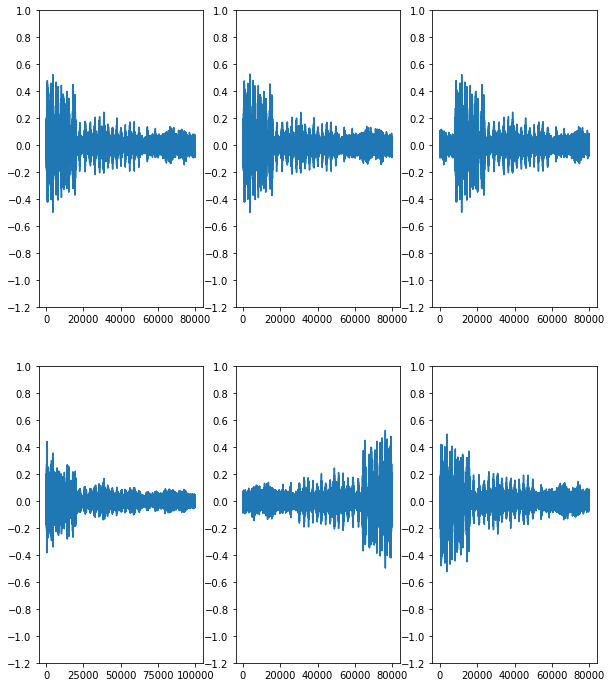

In [6]:
#make more data
def load_wav_16k_mono(filename):
    """ read in a waveform file and convert to 16 kHz mono """
    file_contents = tf.io.read_file(filename)
    wav, sample_rate = tf.audio.decode_wav(
          file_contents,
          desired_channels=1)
    wav = tf.squeeze(wav, axis=-1)
    sample_rate = tf.cast(sample_rate, dtype=tf.int64)
    wav = tfio.audio.resample(wav, rate_in=sample_rate, rate_out=16000)
    return wav

def to_16k_mono(wav, sample_rate):
    wav = tf.squeeze(wav, axis=-1)
    sample_rate = tf.cast(sample_rate, dtype=tf.int64)
    wav = tfio.audio.resample(wav, rate_in=sample_rate, rate_out=16000)
    return wav

def adding_white_noise(data, f, sr=16000, noise_rate=0.005):
    # noise 방식으로 일반적으로 쓰는 잡음 끼게 하는 겁니다.
    wn = np.random.randn(len(data))
    data_wn = data + noise_rate*wn
#     plot_time_series(data_wn)
    save_file_name = f[:-4] + '_wn.wav'
#     soundfile.write(save_file_name, data_wn, sr) # 저장
    return data_wn

def shifting_sound(data, f, sr=16000, roll_rate=0.1):
    # 그냥 [1, 2, 3, 4] 를 [4, 1, 2, 3]으로 만들어주는겁니다.
    data_roll = np.roll(data, int(len(data) * roll_rate))
    
    save_file_name = f[:-4] + '_sh.wav'
#     soundfile.write(save_file_name, data_roll, sr) # 저장
#     plot_time_series(data_roll)
#     librosa.output.write_wav('./audio/rs.wav', data, sr=sr)    
    return data_roll
def stretch_sound(data, f, sr=16000, rate=0.8):
    # stretch 해주는 것 테이프 늘어진 것처럼 들린다.
    data = data.numpy()
    stretch_data = librosa.effects.time_stretch(data, rate)
    save_file_name = f[:-4] + '_st.wav'
#     soundfile.write(save_file_name, stretch_data, sr) # 저장
#     plot_time_series(stretch_data)
#     librosa.output.write_wav('./audio/st.wav', stretch_data, sr=sr)
    return stretch_data

def reverse_sound(data, f, sr=16000):
    # 거꾸로 재생
    data_len = len(data)
    data = np.array([data[len(data)-1-i] for i in range(len(data))])
    save_file_name = f[:-4] + '_re.wav'
#     soundfile.write(save_file_name, data, sr) # 저장
#     plot_time_series(data)
#     librosa.output.write_wav('./audio/re.wav', data, sr=sr)
    return data

def minus_sound(data, f, sr=16000):
    # 위상을 뒤집는 것으로서 원래 소리와 똑같이 들린다.
    data_mi = (-1)*data
    save_file_name = f[:-4] + '_mi.wav'
#     soundfile.write(save_file_name, data_mi, sr) # 저장
#     plot_time_series(temp_numpy)
#     librosa.output.write_wav('./audio/mi.wav', temp_numpy, sr=sr)
    return data_mi

import os
from IPython import display
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import librosa

import tensorflow as tf

# import tensorflow_datasets as tfds
import tensorflow_hub as hub
import tensorflow_io as tfio

import torch
import time
import torchaudio
import soundfile


meta = './meta/'
base_data_path = './audio/'
file_list = os.listdir(meta)
file_list_py = [file for file in file_list if file == 'esc50.csv'] ##
file_list_bd = os.listdir(base_data_path)

base_data = [file for file in file_list_bd if file.endswith('.wav')]
df = pd.DataFrame()
for i in file_list_py:
    data = pd.read_csv(meta + i)
    df = pd.concat([df,data])
df = df.reset_index(drop = True)
cnt = 0
for f in df['filename']:
    if cnt > 1: break
    cnt += 1
    start_time = time.time()
    f = base_data_path + f
    wav = load_wav_16k_mono(f)
#     file_contents = tf.io.read_file(f)
#     wav, sample_rate = tf.audio.decode_wav(file_contents,desired_channels=1)
#     wav_ad = adding_white_noise(to_16k_mono(wav, sample_rate))
    wav_ad = adding_white_noise(wav, f)
    wav_sh = shifting_sound(wav, f)
#     wav_sh = to_16k_mono(wav_sh, sample_rate)
    
    wav_st = stretch_sound(wav, f)
#     wav_st = to_16k_mono(wav_st, sample_rate)
    wav_re = reverse_sound(wav, f)
    
    wav_mi = minus_sound(wav, f)
#     wav_mi = to_16k_mono(wav_mi, sample_rate)
    
#     wav = tf.squeeze(wav, axis=-1)
#     sample_rate = tf.cast(sample_rate, dtype=tf.int64)
#     wav = tfio.audio.resample(wav, rate_in=sample_rate, rate_out=16000)
#     waveform, sample_r = torchaudio.load(f)
    print(cnt,' time per audio : ', time.time()-start_time)
# wav = load_wav_16k_mono(base_data_path + df['filename'][0])
wav_np = wav.numpy()
wav_arr = [wav_np, wav_ad, wav_sh, wav_st, wav_re, wav_mi]
rows = 2
cols = 3
n = rows*cols
fig, axes = plt.subplots(rows, cols, figsize=(10, 12))
for i, audio in enumerate(wav_arr):
    r = i // cols
    c = i % cols
    ax = axes[r][c]
    ax.plot(audio)
    ax.set_yticks(np.arange(-1.2, 1.2, 0.2))
    
plt.show()


# plt.figure()
# plt.plot(wav_np)
# plt.figure()
# plt.plot(wav_ad)
# plt.figure()
# plt.plot(wav_sh)
# plt.figure()
# plt.plot(wav_st)
# plt.figure()
# plt.plot(wav_re)
# plt.figure()
# plt.plot(wav_mi)


# tensorflow 제공 코드

                    filename  fold  target category  esc10  src_file take
0   ./audio/1-100032-A-0.wav     1       0      dog   True    100032    A
8   ./audio/1-103298-A-9.wav     1       9     crow  False    103298    A
14  ./audio/1-110389-A-0.wav     1       0      dog   True    110389    A
29  ./audio/1-121951-A-8.wav     1       8    sheep  False    121951    A
45   ./audio/1-15689-A-4.wav     1       4     frog  False     15689    A
46   ./audio/1-15689-B-4.wav     1       4     frog  False     15689    B
49   ./audio/1-16568-A-3.wav     1       3      cow  False     16568    A
64   ./audio/1-17585-A-7.wav     1       7  insects  False     17585    A
69   ./audio/1-17970-A-4.wav     1       4     frog  False     17970    A
70   ./audio/1-18074-A-6.wav     1       6      hen  False     18074    A
(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))
<MapDataset shapes: (<unknown>, (), (

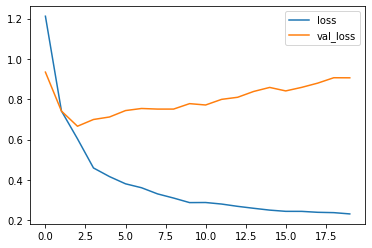

<PrefetchDataset shapes: ((None, 1024), (None,)), types: (tf.float32, tf.int64)>
(25, 32, 1024) (25, 32)
[[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
 [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
 [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4]
 [4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5]
 [5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5]
 [4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 3 3]
 [3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]
 [3 3 3 3 3 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 7 7 7 7 7 7]
 [7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7]
 [7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7]
 [8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8]
 [8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8]
 [8 8 8 8 8 8 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 3 3 3 3 3 3 3 

(25, 32, 10)
(25, 32)
[[2 3 2 6 3 2 2 0 2 2 6 6 1 3 1 1 1 1 1 1 2 2 2 2 3 1 1 1 1 1 2 6]
 [1 1 1 1 1 1 1 1 2 2 2 6 6 2 2 2 2 5 2 1 1 1 1 1 1 1 1 1 2 2 1 1]
 [1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 4 9 4 0 9 4 4 0 6 4 0 4 1 6 3 5]
 [5 0 0 0 0 9 5 5 5 5 9 1 1 1 6 4 4 4 4 4 5 0 0 9 6 3 8 5 5 5 5 6]
 [0 2 5 5 5 5 5 5 5 0 5 5 8 5 5 5 5 5 9 5 5 5 5 5 5 5 5 0 1 1 1 1]
 [4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 3 3]
 [3 7 1 6 2 3 2 3 3 3 3 3 3 3 5 9 3 3 3 3 3 3 3 3 0 1 5 0 3 3 3 3]
 [3 0 3 5 3 3 1 5 1 1 6 0 7 8 7 8 1 1 1 3 3 0 7 0 0 0 7 7 7 7 7 7]
 [5 7 7 5 7 7 7 7 7 8 5 0 2 8 2 2 3 7 2 2 7 3 3 2 7 7 7 7 7 7 7 7]
 [7 7 7 7 7 7 7 7 7 7 7 3 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7]
 [8 8 8 8 2 8 6 6 3 7 8 8 8 8 8 8 8 8 8 6 6 8 8 8 8 8 8 8 8 6 5 8]
 [8 8 3 8 8 8 8 6 8 8 8 8 3 3 8 4 8 8 8 8 8 8 8 8 8 8 8 3 3 3 8 8]
 [8 8 8 8 8 8 1 1 1 1 5 6 5 0 1 1 1 1 1 1 6 5 5 5 1 1 5 1 1 1 1 1]
 [5 5 1 1 2 3 3 5 3 3 3 3 5 3 0 0 0 5 2 0 0 0 0 0 6 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 6 0 0 0 0 0 

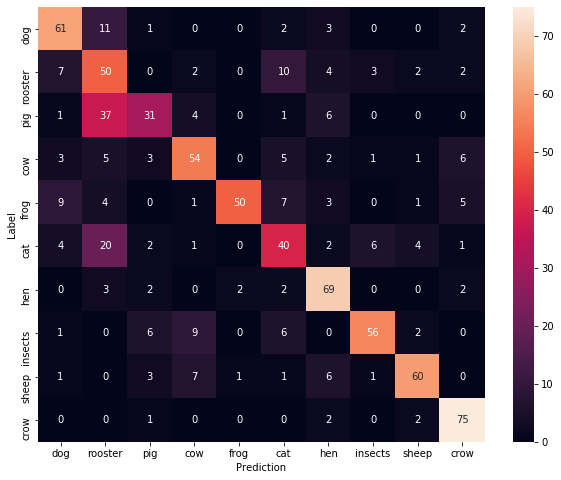

tf.Tensor(
[-6.3563688e-09  4.6114458e-08 -2.4949784e-08 ...  2.5709625e-04
  2.0585055e-04  2.7292026e-05], shape=(87864,), dtype=float32)
[ 14.022225    -2.8888679   -7.2146072   -4.167527   -17.906466
  -3.010258    -0.19331767  -7.651298    -7.9844403   -9.288776  ]
The main sound is: dog


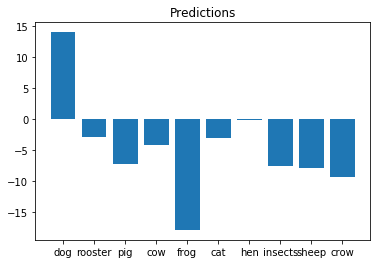

In [2]:
#tensorflow yamnet 예제코드
import os

from IPython import display
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import tensorflow as tf

# import tensorflow_datasets as tfds
import tensorflow_hub as hub
import tensorflow_io as tfio

@tf.function
def load_wav_16k_mono(filename):
    """ read in a waveform file and convert to 16 kHz mono """
    file_contents = tf.io.read_file(filename)
    wav, sample_rate = tf.audio.decode_wav(file_contents,desired_channels=1)
    wav = tf.squeeze(wav, axis=-1)
    sample_rate = tf.cast(sample_rate, dtype=tf.int64)
    wav = tfio.audio.resample(wav, rate_in=sample_rate, rate_out=16000)
    return wav


yamnet_model_handle = 'https://tfhub.dev/google/yamnet/1'
yamnet_model = hub.load(yamnet_model_handle)

esc50_csv = './meta/esc50.csv'
base_data_path = './audio/'

#파일 불러오기
pd_data = pd.read_csv(esc50_csv, encoding = 'cp949')
pd_data.head()

#클래스 지정, 필터링
animal_classes = ['dog', 'rooster', 'pig', 'cow', 'frog', 'cat', 'hen', 'insects', 'sheep', 'crow']
animal_class_to_id = {'dog':0, 'rooster':1, 'pig':2, 'cow':3, 'frog':4, 'cat':5, 'hen':6, 'insects':7, 'sheep':8, 'crow':9}

filtered_pd = pd_data[pd_data.category.isin(animal_classes)]

class_id = filtered_pd['category'].apply(lambda name: animal_class_to_id[name])
filtered_pd = filtered_pd.assign(target=class_id)

full_path = filtered_pd['filename'].apply(lambda row: os.path.join(base_data_path, row))
filtered_pd = filtered_pd.assign(filename=full_path)
print(filtered_pd.head(10))

#데이터 
filenames = filtered_pd['filename']
targets = filtered_pd['target']
folds = filtered_pd['fold']

main_ds = tf.data.Dataset.from_tensor_slices((filenames, targets, folds))
print(main_ds.element_spec)

#모델을 위한 wav 데이터 mapping
def load_wav_for_map(filename, label, fold):
    return load_wav_16k_mono(filename), label, fold

main_ds = main_ds.map(load_wav_for_map)
print(main_ds)
print(main_ds.element_spec)

def extract_embedding(wav_data, label, fold):
    ''' run YAMNet to extract embedding from the wav data '''
    scores, embeddings, spectrogram = yamnet_model(wav_data)
    num_embeddings = tf.shape(embeddings)[0]
    return (embeddings, tf.repeat(label, num_embeddings), tf.repeat(fold, num_embeddings))

# extract embedding
main_ds = main_ds.map(extract_embedding).unbatch()
print(main_ds.element_spec)

cached_ds = main_ds.cache()
train_ds = cached_ds.filter(lambda embedding, label, fold: fold < 4)
val_ds = cached_ds.filter(lambda embedding, label, fold: fold == 4)
test_ds = cached_ds.filter(lambda embedding, label, fold: fold == 5)

# remove the folds column now that it's not needed anymore
remove_fold_column = lambda embedding, label, fold: (embedding, label)

train_ds = train_ds.map(remove_fold_column)
val_ds = val_ds.map(remove_fold_column)
test_ds = test_ds.map(remove_fold_column)

train_ds = train_ds.cache().shuffle(1000).batch(32).prefetch(tf.data.AUTOTUNE)
val_ds = val_ds.cache().batch(32).prefetch(tf.data.AUTOTUNE)
test_ds = test_ds.cache().batch(32).prefetch(tf.data.AUTOTUNE)

my_model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(1024), dtype=tf.float32,
                          name='input_embedding'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(len(animal_classes))
], name='my_model')

print(my_model.summary())
print(train_ds)
my_model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                 optimizer="adam", metrics=['accuracy'])

callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3, restore_best_weights=True)

history = my_model.fit(train_ds, epochs=20, validation_data=val_ds, callbacks=callback)

loss, accuracy = my_model.evaluate(test_ds)
print("Loss: ", loss)
print("Accuracy: ", accuracy)

metrics = history.history
plt.plot(history.epoch, metrics['loss'], metrics['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.show()

print(test_ds)

test_audio = []
test_labels = []

for audio, label in test_ds:
    test_audio.append(audio.numpy())
    test_labels.append(label.numpy())

test_audio = np.array(test_audio)
test_labels = np.array(test_labels)
print(test_audio.shape, test_labels.shape)
# print(test_labels.shape)
print(test_labels)

print(my_model.predict(test_audio).shape)

y_pred = np.argmax(my_model.predict(test_audio), axis=2)
y_true = test_labels
print(y_pred.shape)
print(y_pred)
y_pred = y_pred.flatten()
y_true = y_true.flatten()

confusion_mtx = tf.math.confusion_matrix(y_true, y_pred) 
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx, xticklabels=animal_classes, yticklabels=animal_classes,annot=True, fmt='g')
plt.xlabel('Prediction')
plt.ylabel('Label')
plt.show()

testing_wav_file_name = 'dog01.wav'
testing_wav_data = load_wav_16k_mono(testing_wav_file_name)
print(testing_wav_data)
scores, embeddings, spectrogram = yamnet_model(testing_wav_data)
result = my_model(embeddings).numpy()
print(result.mean(axis=0))

infered_class = animal_classes[result.mean(axis=0).argmax()]
print(f'The main sound is: {infered_class}')

plt.bar(animal_classes, result.mean(axis=0))
plt.title('Predictions')
plt.show()

# scores, embeddings, spectrogram = yamnet_model(testing_wav_data)
# class_scores = tf.reduce_mean(scores, axis=0)
# top_class = tf.argmax(class_scores)
# infered_class = class_names[top_class]
# top_score = class_scores[top_class]
# print(f'[YAMNet] The main sound is: {infered_class} ({top_score})')

# TensorFlow 제공 코드(확장된 데이터셋을 이용)

                    filename  fold  target category  esc10  src_file take
0   ./audio/1-100032-A-0.wav     1       0      dog   True    100032    A
8   ./audio/1-103298-A-9.wav     1       9     crow  False    103298    A
14  ./audio/1-110389-A-0.wav     1       0      dog   True    110389    A
29  ./audio/1-121951-A-8.wav     1       8    sheep  False    121951    A
45   ./audio/1-15689-A-4.wav     1       4     frog  False     15689    A
46   ./audio/1-15689-B-4.wav     1       4     frog  False     15689    B
49   ./audio/1-16568-A-3.wav     1       3      cow  False     16568    A
64   ./audio/1-17585-A-7.wav     1       7  insects  False     17585    A
69   ./audio/1-17970-A-4.wav     1       4     frog  False     17970    A
70   ./audio/1-18074-A-6.wav     1       6      hen  False     18074    A
(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))
<MapDataset shapes: (<unknown>, (), (

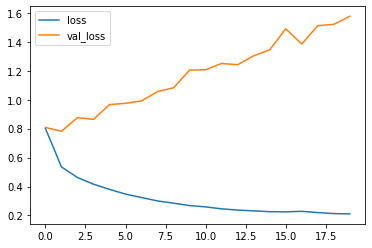

<PrefetchDataset shapes: ((None, 1024), (None,)), types: (tf.float32, tf.int64)>
(155, 32, 1024) (155, 32)
[[2 2 2 ... 2 2 2]
 [2 2 2 ... 2 2 2]
 [2 2 2 ... 4 4 4]
 ...
 [3 3 3 ... 5 5 5]
 [5 5 5 ... 6 6 6]
 [6 6 6 ... 0 0 0]]


(155, 32, 10)
(155, 32)
[[2 3 6 ... 1 2 6]
 [1 1 1 ... 2 1 1]
 [1 1 1 ... 0 9 5]
 ...
 [3 5 3 ... 1 1 1]
 [1 1 1 ... 6 6 6]
 [1 6 6 ... 1 1 1]]


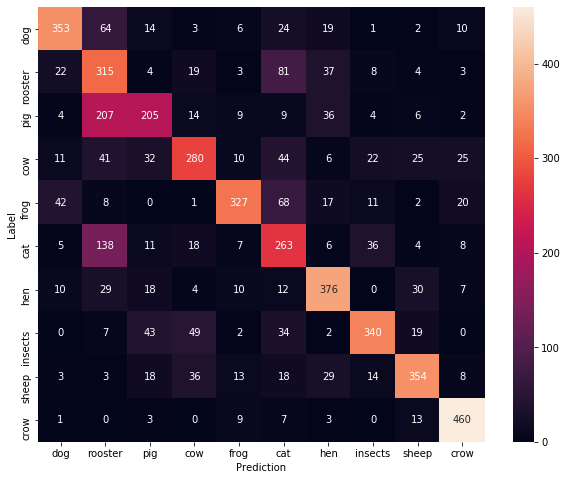

tf.Tensor(
[-6.3563688e-09  4.6114458e-08 -2.4949784e-08 ...  2.5709625e-04
  2.0585055e-04  2.7292026e-05], shape=(87864,), dtype=float32)
[ 22.784746   -6.388284  -16.007877  -10.358705  -20.526814  -18.056503
   1.7407039 -10.951882  -12.371955  -25.579859 ]
The main sound is: dog


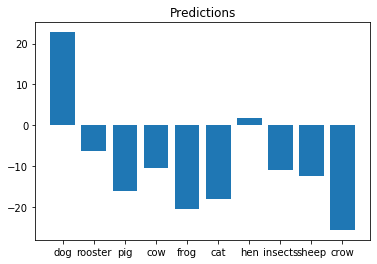

In [3]:
#tensorflow yamnet 예제코드 extended
import os

from IPython import display
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import tensorflow as tf

# import tensorflow_datasets as tfds
import tensorflow_hub as hub
import tensorflow_io as tfio

@tf.function
def load_wav_16k_mono(filename):
    """ read in a waveform file and convert to 16 kHz mono """
    file_contents = tf.io.read_file(filename)
    wav, sample_rate = tf.audio.decode_wav(file_contents,desired_channels=1)
    wav = tf.squeeze(wav, axis=-1)
    sample_rate = tf.cast(sample_rate, dtype=tf.int64)
    wav = tfio.audio.resample(wav, rate_in=sample_rate, rate_out=16000)
    return wav


yamnet_model_handle = 'https://tfhub.dev/google/yamnet/1'
yamnet_model = hub.load(yamnet_model_handle)

esc50_csv = './meta/esc50_extend.csv'
base_data_path = './audio/'

#파일 불러오기
pd_data = pd.read_csv(esc50_csv, encoding = 'cp949')
pd_data.head()

#클래스 지정, 필터링
animal_classes = ['dog', 'rooster', 'pig', 'cow', 'frog', 'cat', 'hen', 'insects', 'sheep', 'crow']
animal_class_to_id = {'dog':0, 'rooster':1, 'pig':2, 'cow':3, 'frog':4, 'cat':5, 'hen':6, 'insects':7, 'sheep':8, 'crow':9}

filtered_pd = pd_data[pd_data.category.isin(animal_classes)]

class_id = filtered_pd['category'].apply(lambda name: animal_class_to_id[name])
filtered_pd = filtered_pd.assign(target=class_id)

full_path = filtered_pd['filename'].apply(lambda row: os.path.join(base_data_path, row))
filtered_pd = filtered_pd.assign(filename=full_path)
print(filtered_pd.head(10))

#데이터 
filenames = filtered_pd['filename']
targets = filtered_pd['target']
folds = filtered_pd['fold']

main_ds = tf.data.Dataset.from_tensor_slices((filenames, targets, folds))
print(main_ds.element_spec)

#모델을 위한 wav 데이터 mapping
def load_wav_for_map(filename, label, fold):
    return load_wav_16k_mono(filename), label, fold

main_ds = main_ds.map(load_wav_for_map)
print(main_ds)
print(main_ds.element_spec)

def extract_embedding(wav_data, label, fold):
    ''' run YAMNet to extract embedding from the wav data '''
    scores, embeddings, spectrogram = yamnet_model(wav_data)
    num_embeddings = tf.shape(embeddings)[0]
    return (embeddings, tf.repeat(label, num_embeddings), tf.repeat(fold, num_embeddings))

# extract embedding
main_ds = main_ds.map(extract_embedding).unbatch()
print(main_ds.element_spec)

cached_ds = main_ds.cache()
train_ds = cached_ds.filter(lambda embedding, label, fold: fold < 4)
val_ds = cached_ds.filter(lambda embedding, label, fold: fold == 4)
test_ds = cached_ds.filter(lambda embedding, label, fold: fold == 5)

# remove the folds column now that it's not needed anymore
remove_fold_column = lambda embedding, label, fold: (embedding, label)

train_ds = train_ds.map(remove_fold_column)
val_ds = val_ds.map(remove_fold_column)
test_ds = test_ds.map(remove_fold_column)

train_ds = train_ds.cache().shuffle(1000).batch(32).prefetch(tf.data.AUTOTUNE)
val_ds = val_ds.cache().batch(32).prefetch(tf.data.AUTOTUNE)
test_ds = test_ds.cache().batch(32).prefetch(tf.data.AUTOTUNE)

my_model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(1024), dtype=tf.float32,
                          name='input_embedding'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(len(animal_classes))
], name='my_model')

print(my_model.summary())
print(train_ds)
my_model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                 optimizer="adam", metrics=['accuracy'])

callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3, restore_best_weights=True)

history = my_model.fit(train_ds, epochs=20, validation_data=val_ds, callbacks=callback)

loss, accuracy = my_model.evaluate(test_ds)
print("Loss: ", loss)
print("Accuracy: ", accuracy)

metrics = history.history
plt.plot(history.epoch, metrics['loss'], metrics['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.show()

print(test_ds)

test_audio = []
test_labels = []

for audio, label in test_ds:
    test_audio.append(audio.numpy())
    test_labels.append(label.numpy())

test_audio = np.array(test_audio)
test_labels = np.array(test_labels)
print(test_audio.shape, test_labels.shape)
# print(test_labels.shape)
print(test_labels)

print(my_model.predict(test_audio).shape)

y_pred = np.argmax(my_model.predict(test_audio), axis=2)
y_true = test_labels
print(y_pred.shape)
print(y_pred)
y_pred = y_pred.flatten()
y_true = y_true.flatten()

confusion_mtx = tf.math.confusion_matrix(y_true, y_pred) 
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx, xticklabels=animal_classes, yticklabels=animal_classes,annot=True, fmt='g')
plt.xlabel('Prediction')
plt.ylabel('Label')
plt.show()

testing_wav_file_name = 'dog01.wav'
testing_wav_data = load_wav_16k_mono(testing_wav_file_name)
print(testing_wav_data)
scores, embeddings, spectrogram = yamnet_model(testing_wav_data)
result = my_model(embeddings).numpy()
print(result.mean(axis=0))

infered_class = animal_classes[result.mean(axis=0).argmax()]
print(f'The main sound is: {infered_class}')

plt.bar(animal_classes, result.mean(axis=0))
plt.title('Predictions')
plt.show()

# scores, embeddings, spectrogram = yamnet_model(testing_wav_data)
# class_scores = tf.reduce_mean(scores, axis=0)
# top_class = tf.argmax(class_scores)
# infered_class = class_names[top_class]
# top_score = class_scores[top_class]
# print(f'[YAMNet] The main sound is: {infered_class} ({top_score})')

# TensorFlow 제공 코드(모델:yamnet+resnet)

                    filename  fold  target category  esc10  src_file take
0   ./audio/1-100032-A-0.wav     1       0      dog   True    100032    A
8   ./audio/1-103298-A-9.wav     1       9     crow  False    103298    A
14  ./audio/1-110389-A-0.wav     1       0      dog   True    110389    A
29  ./audio/1-121951-A-8.wav     1       8    sheep  False    121951    A
45   ./audio/1-15689-A-4.wav     1       4     frog  False     15689    A
46   ./audio/1-15689-B-4.wav     1       4     frog  False     15689    B
49   ./audio/1-16568-A-3.wav     1       3      cow  False     16568    A
64   ./audio/1-17585-A-7.wav     1       7  insects  False     17585    A
69   ./audio/1-17970-A-4.wav     1       4     frog  False     17970    A
70   ./audio/1-18074-A-6.wav     1       6      hen  False     18074    A


<_UnbatchDataset shapes: ((1024,), (), ()), types: (tf.float32, tf.int64, tf.int64)>
Epoch 1/100
75/75 [==============================] - 28s 201ms/step - loss: 7.2367 - accuracy: 0.1704 - val_loss: 7.4902 - val_accuracy: 0.1138
Epoch 2/100
75/75 [==============================] - 6s 85ms/step - loss: 6.6460 - accuracy: 0.3913 - val_loss: 7.3567 - val_accuracy: 0.1700
Epoch 3/100
75/75 [==============================] - 6s 85ms/step - loss: 6.0545 - accuracy: 0.4950 - val_loss: 7.1304 - val_accuracy: 0.2000
Epoch 4/100
75/75 [==============================] - 6s 84ms/step - loss: 5.6432 - accuracy: 0.5546 - val_loss: 6.3686 - val_accuracy: 0.4825
Epoch 5/100
75/75 [==============================] - 6s 81ms/step - loss: 5.2520 - accuracy: 0.5800 - val_loss: 5.8714 - val_accuracy: 0.4563
Epoch 6/100
75/75 [==============================] - 6s 83ms/step - loss: 4.7633 - accuracy: 0.6492 - val_loss: 4.4562 - val_accuracy: 0.5788
Epoch 7/100
75/75 [==============================] - 6s 81ms/

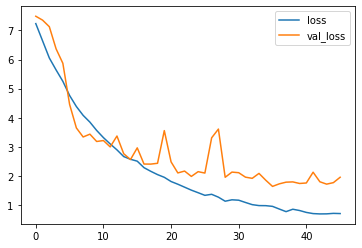

<PrefetchDataset shapes: ((None, 1024), (None,)), types: (tf.float32, tf.int64)>
(25, 32)
[[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
 [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
 [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4]
 [4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5]
 [5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5]
 [4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 3 3]
 [3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]
 [3 3 3 3 3 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 7 7 7 7 7 7]
 [7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7]
 [7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7]
 [8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8]
 [8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8]
 [8 8 8 8 8 8 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 3 3 3 3 3 3 3 3 3 3 0 0 0 0 0

NameError: name 'my_model' is not defined

In [3]:
#yamnet+resnet
import os

from IPython import display
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import tensorflow as tf

# import tensorflow_datasets as tfds
import tensorflow_hub as hub
import tensorflow_io as tfio

@tf.function
def load_wav_16k_mono(filename):
    """ read in a waveform file and convert to 16 kHz mono """
    file_contents = tf.io.read_file(filename)
    wav, sample_rate = tf.audio.decode_wav(
          file_contents,
          desired_channels=1)
    wav = tf.squeeze(wav, axis=-1)
    sample_rate = tf.cast(sample_rate, dtype=tf.int64)
    wav = tfio.audio.resample(wav, rate_in=sample_rate, rate_out=16000)
    return wav



yamnet_model_handle = 'https://tfhub.dev/google/yamnet/1'
yamnet_model = hub.load(yamnet_model_handle)

esc50_csv = './meta/esc50.csv'
base_data_path = './audio/'

#파일 불러오기
pd_data = pd.read_csv(esc50_csv, encoding = 'cp949')
pd_data.head()

#클래스 지정, 필터링
animal_classes = ['dog', 'rooster', 'pig', 'cow', 'frog', 'cat', 'hen', 'insects', 'sheep', 'crow']
animal_class_to_id = {'dog':0, 'rooster':1, 'pig':2, 'cow':3, 'frog':4, 'cat':5, 'hen':6, 'insects':7, 'sheep':8, 'crow':9}

filtered_pd = pd_data[pd_data.category.isin(animal_classes)]

class_id = filtered_pd['category'].apply(lambda name: animal_class_to_id[name])
filtered_pd = filtered_pd.assign(target=class_id)

full_path = filtered_pd['filename'].apply(lambda row: os.path.join(base_data_path, row))
filtered_pd = filtered_pd.assign(filename=full_path)
print(filtered_pd.head(10))

#데이터 
filenames = filtered_pd['filename']
targets = filtered_pd['target']
folds = filtered_pd['fold']

main_ds = tf.data.Dataset.from_tensor_slices((filenames, targets, folds))
# print(main_ds.element_spec)

#모델을 위한 wav 데이터 mapping
def load_wav_for_map(filename, label, fold):
    return load_wav_16k_mono(filename), label, fold

main_ds = main_ds.map(load_wav_for_map)
# print(main_ds)
# print(main_ds.element_spec)

def extract_embedding(wav_data, label, fold):
    ''' run YAMNet to extract embedding from the wav data '''
    scores, embeddings, spectrogram = yamnet_model(wav_data)
    num_embeddings = tf.shape(embeddings)[0]
#     embeddings = tf.reshape(embeddings, [10,32,32,1])
    return (embeddings, tf.repeat(label, num_embeddings), tf.repeat(fold, num_embeddings))

# extract embedding
main_ds = main_ds.map(extract_embedding).unbatch()

print(main_ds)
# print(main_ds.element_spec)

cached_ds = main_ds.cache()
train_ds = cached_ds.filter(lambda embedding, label, fold: fold < 4)
val_ds = cached_ds.filter(lambda embedding, label, fold: fold == 4)
test_ds = cached_ds.filter(lambda embedding, label, fold: fold == 5)

# remove the folds column now that it's not needed anymore
remove_fold_column = lambda embedding, label, fold: (embedding, label)

train_ds = train_ds.map(remove_fold_column)
val_ds = val_ds.map(remove_fold_column)
test_ds = test_ds.map(remove_fold_column)

train_ds = train_ds.cache().shuffle(1000).batch(32).prefetch(tf.data.AUTOTUNE)
val_ds = val_ds.cache().batch(32).prefetch(tf.data.AUTOTUNE)
test_ds = test_ds.cache().batch(32).prefetch(tf.data.AUTOTUNE)

Res_model_ = tf.keras.applications.ResNet152V2(include_top=False, weights = None,
                                              classes = 10, input_shape = [32,32,1], pooling='max')
Res_model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(1024), dtype=tf.float32, name='input_embedding'),
    tf.keras.layers.Reshape((32, 32,), input_shape=(1024,)),
    Res_model_,
], name='Res_model'
)
# my_model = tf.keras.Sequential([
#     tf.keras.layers.Input(shape=(1024), dtype=tf.float32,
#                           name='input_embedding'),
#     tf.keras.layers.Dense(512, activation='relu'),
#     tf.keras.layers.Dense(len(animal_classes))
# ], name='my_model')

# print(my_model.summary())
Res_model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                 optimizer="adam", metrics=['accuracy'])
# my_model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
#                  optimizer="adam", metrics=['accuracy'])

callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3, restore_best_weights=True)

# history = my_model.fit(train_ds, epochs=1, validation_data=val_ds, callbacks=callback)
# loss, accuracy = my_model.evaluate(test_ds)
history = Res_model.fit(train_ds, epochs=100, validation_data=val_ds, callbacks=callback)
loss, accuracy = Res_model.evaluate(test_ds)

print("Loss: ", loss)
print("Accuracy: ", accuracy)

metrics = history.history
plt.plot(history.epoch, metrics['loss'], metrics['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.show()

print(test_ds)

test_audio = []
test_labels = []

for audio, label in test_ds:
    test_audio.append(audio.numpy())
    test_labels.append(label.numpy())

test_audio = np.array(test_audio)
test_labels = np.array(test_labels)
# print(test_audio.shape, test_labels.shape)
print(test_labels.shape)
print(test_labels)

print(my_model.predict(test_audio).shape)

y_pred = np.argmax(my_model.predict(test_audio), axis=2)
y_true = test_labels
print(y_pred.shape)
print(y_pred)
y_pred = y_pred.flatten()
y_true = y_true.flatten()

confusion_mtx = tf.math.confusion_matrix(y_true, y_pred) 
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx, xticklabels=animal_classes, yticklabels=animal_classes,annot=True, fmt='g')
plt.xlabel('Prediction')
plt.ylabel('Label')
plt.show()

testing_wav_file_name = 'frog02.wav'
testing_wav_data = load_wav_16k_mono(testing_wav_file_name)

scores, embeddings, spectrogram = yamnet_model(testing_wav_data)
result = my_model(embeddings).numpy()
print(result.mean(axis=0))

infered_class = animal_classes[result.mean(axis=0).argmax()]
print(f'The main sound is: {infered_class}')

# scores, embeddings, spectrogram = yamnet_model(testing_wav_data)
# class_scores = tf.reduce_mean(scores, axis=0)
# top_class = tf.argmax(class_scores)
# infered_class = class_names[top_class]
# top_score = class_scores[top_class]
# print(f'[YAMNet] The main sound is: {infered_class} ({top_score})')

In [38]:
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.
# ==============================================================================
# Copyright 2019 The TensorFlow Authors All Rights Reserved.
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.
# ==============================================================================

"""Hyperparameters for YAMNet."""

from dataclasses import dataclass

# The following hyperparameters (except patch_hop_seconds) were used to train YAMNet,
# so expect some variability in performance if you change these. The patch hop can
# be changed arbitrarily: a smaller hop should give you more patches from the same
# clip and possibly better performance at a larger computational cost.
@dataclass(frozen=True)  # Instances of this class are immutable.
class Params:
    sample_rate: float = 16000.0
    stft_window_seconds: float = 0.025
    stft_hop_seconds: float = 0.010
    mel_bands: int = 64
    mel_min_hz: float = 125.0
    mel_max_hz: float = 7500.0
    log_offset: float = 0.001
    patch_window_seconds: float = 0.96
    patch_hop_seconds: float = 0.48

    @property
    def patch_frames(self):
        return int(round(self.patch_window_seconds / self.stft_hop_seconds))

    @property
    def patch_bands(self):
        return self.mel_bands

    num_classes: int = 521
    conv_padding: str = 'same'
    batchnorm_center: bool = True
    batchnorm_scale: bool = False
    batchnorm_epsilon: float = 1e-4
    classifier_activation: str = 'sigmoid'
    tflite_compatible: bool = False

"""Feature computation for YAMNet."""

import numpy as np
import tensorflow as tf


def waveform_to_log_mel_spectrogram_patches(waveform, params):
    """Compute log mel spectrogram patches of a 1-D waveform."""
    with tf.name_scope('log_mel_features'):
    # waveform has shape [<# samples>]

    # Convert waveform into spectrogram using a Short-Time Fourier Transform.
    # Note that tf.signal.stft() uses a periodic Hann window by default.
        window_length_samples = int(
          round(params.sample_rate * params.stft_window_seconds))
        hop_length_samples = int(
          round(params.sample_rate * params.stft_hop_seconds))
        fft_length = 2 ** int(np.ceil(np.log(window_length_samples) / np.log(2.0)))
        num_spectrogram_bins = fft_length // 2 + 1
        if params.tflite_compatible:
            magnitude_spectrogram = _tflite_stft_magnitude(
              signal=waveform,
              frame_length=window_length_samples,
              frame_step=hop_length_samples,
              fft_length=fft_length)
        else:
            magnitude_spectrogram = tf.abs(tf.signal.stft(
              signals=waveform,
              frame_length=window_length_samples,
              frame_step=hop_length_samples,
              fft_length=fft_length))
        # magnitude_spectrogram has shape [<# STFT frames>, num_spectrogram_bins]

        # Convert spectrogram into log mel spectrogram.
        linear_to_mel_weight_matrix = tf.signal.linear_to_mel_weight_matrix(
            num_mel_bins=params.mel_bands,
            num_spectrogram_bins=num_spectrogram_bins,
            sample_rate=params.sample_rate,
            lower_edge_hertz=params.mel_min_hz,
            upper_edge_hertz=params.mel_max_hz)
        mel_spectrogram = tf.matmul(
          magnitude_spectrogram, linear_to_mel_weight_matrix)
        log_mel_spectrogram = tf.math.log(mel_spectrogram + params.log_offset)
        # log_mel_spectrogram has shape [<# STFT frames>, params.mel_bands]

        # Frame spectrogram (shape [<# STFT frames>, params.mel_bands]) into patches
        # (the input examples). Only complete frames are emitted, so if there is
        # less than params.patch_window_seconds of waveform then nothing is emitted
        # (to avoid this, zero-pad before processing).
        spectrogram_hop_length_samples = int(
          round(params.sample_rate * params.stft_hop_seconds))
        spectrogram_sample_rate = params.sample_rate / spectrogram_hop_length_samples
        patch_window_length_samples = int(
          round(spectrogram_sample_rate * params.patch_window_seconds))
        patch_hop_length_samples = int(
          round(spectrogram_sample_rate * params.patch_hop_seconds))
        features = tf.signal.frame(
            signal=log_mel_spectrogram,
            frame_length=patch_window_length_samples,
            frame_step=patch_hop_length_samples,
            axis=0)
        # features has shape [<# patches>, <# STFT frames in an patch>, params.mel_bands]

        return log_mel_spectrogram, features


def pad_waveform(waveform, params):
    """Pads waveform with silence if needed to get an integral number of patches."""
    # In order to produce one patch of log mel spectrogram input to YAMNet, we
    # need at least one patch window length of waveform plus enough extra samples
    # to complete the final STFT analysis window.
    min_waveform_seconds = (
      params.patch_window_seconds +
      params.stft_window_seconds - params.stft_hop_seconds)
    min_num_samples = tf.cast(min_waveform_seconds * params.sample_rate, tf.int32)
    num_samples = tf.shape(waveform)[0]
    num_padding_samples = tf.maximum(0, min_num_samples - num_samples)

    # In addition, there might be enough waveform for one or more additional
    # patches formed by hopping forward. If there are more samples than one patch,
    # round up to an integral number of hops.
    num_samples = tf.maximum(num_samples, min_num_samples)
    num_samples_after_first_patch = num_samples - min_num_samples
    hop_samples = tf.cast(params.patch_hop_seconds * params.sample_rate, tf.int32)
    num_hops_after_first_patch = tf.cast(tf.math.ceil(
          tf.cast(num_samples_after_first_patch, tf.float32) /
          tf.cast(hop_samples, tf.float32)), tf.int32)
    num_padding_samples += (
      hop_samples * num_hops_after_first_patch - num_samples_after_first_patch)

    padded_waveform = tf.pad(waveform, [[0, num_padding_samples]],
                           mode='CONSTANT', constant_values=0.0)
    return padded_waveform


def _tflite_stft_magnitude(signal, frame_length, frame_step, fft_length):
    """TF-Lite-compatible version of tf.abs(tf.signal.stft())."""
    def _hann_window():
        return tf.reshape(
            tf.constant(
              (0.5 - 0.5 * np.cos(2 * np.pi * np.arange(0, 1.0, 1.0 / frame_length))
              ).astype(np.float32),
              name='hann_window'), [1, frame_length])

    def _dft_matrix(dft_length):
        """Calculate the full DFT matrix in NumPy."""
        # See https://en.wikipedia.org/wiki/DFT_matrix
        omega = (0 + 1j) * 2.0 * np.pi / float(dft_length)
        # Don't include 1/sqrt(N) scaling, tf.signal.rfft doesn't apply it.
        return np.exp(omega * np.outer(np.arange(dft_length), np.arange(dft_length)))

    def _rdft(framed_signal, fft_length):
        """Implement real-input Discrete Fourier Transform by matmul."""
        # We are right-multiplying by the DFT matrix, and we are keeping only the
        # first half ("positive frequencies").  So discard the second half of rows,
        # but transpose the array for right-multiplication.  The DFT matrix is
        # symmetric, so we could have done it more directly, but this reflects our
        # intention better.
        complex_dft_matrix_kept_values = _dft_matrix(fft_length)[:(
            fft_length // 2 + 1), :].transpose()
        real_dft_matrix = tf.constant(
            np.real(complex_dft_matrix_kept_values).astype(np.float32),
            name='real_dft_matrix')
        imag_dft_matrix = tf.constant(
            np.imag(complex_dft_matrix_kept_values).astype(np.float32),
            name='imaginary_dft_matrix')
        signal_frame_length = tf.shape(framed_signal)[-1]
        half_pad = (fft_length - signal_frame_length) // 2
        padded_frames = tf.pad(
            framed_signal,
            [
                # Don't add any padding in the frame dimension.
                [0, 0],
                # Pad before and after the signal within each frame.
                [half_pad, fft_length - signal_frame_length - half_pad]
            ],
            mode='CONSTANT',
            constant_values=0.0)
        real_stft = tf.matmul(padded_frames, real_dft_matrix)
        imag_stft = tf.matmul(padded_frames, imag_dft_matrix)
        return real_stft, imag_stft

    def _complex_abs(real, imag):
        return tf.sqrt(tf.add(real * real, imag * imag))

    framed_signal = tf.signal.frame(signal, frame_length, frame_step)
    windowed_signal = framed_signal * _hann_window()
    real_stft, imag_stft = _rdft(windowed_signal, fft_length)
    stft_magnitude = _complex_abs(real_stft, imag_stft)
    return stft_magnitude

def load_wav_16k_mono(filename):
    """ read in a waveform file and convert to 16 kHz mono """
    file_contents = tf.io.read_file(filename)
    wav, sample_rate = tf.audio.decode_wav(file_contents,desired_channels=1)
    wav = tf.squeeze(wav, axis=-1)
    sample_rate = tf.cast(sample_rate, dtype=tf.int64)
    wav = tfio.audio.resample(wav, rate_in=sample_rate, rate_out=16000)
    return wav

wav_file = load_wav_16k_mono('./audio/1-100032-A-0.wav')
wav_spec, feature = waveform_to_log_mel_spectrogram_patches(wav_file, Params)
print(wav_spec, feature)

tf.Tensor(
[[-6.9077554 -6.9077554 -6.9077554 ... -6.9077554 -6.9077554 -6.9077554]
 [-6.9077554 -6.9077554 -6.9077554 ... -6.9077554 -6.9077554 -6.9077554]
 [-6.9077554 -6.9077554 -6.9077554 ... -6.9077554 -6.9077554 -6.9077554]
 ...
 [-6.9077554 -6.9077554 -6.9077554 ... -6.9077554 -6.9077554 -6.9077554]
 [-6.9077554 -6.9077554 -6.9077554 ... -6.9077554 -6.9077554 -6.9077554]
 [-6.9077554 -6.9077554 -6.9077554 ... -6.9077554 -6.9077554 -6.9077554]], shape=(498, 64), dtype=float32) tf.Tensor(
[[[-6.9077554 -6.9077554 -6.9077554 ... -6.9077554 -6.9077554 -6.9077554]
  [-6.9077554 -6.9077554 -6.9077554 ... -6.9077554 -6.9077554 -6.9077554]
  [-6.9077554 -6.9077554 -6.9077554 ... -6.9077554 -6.9077554 -6.9077554]
  ...
  [-6.9077554 -6.9077554 -6.9077554 ... -6.9077554 -6.9077554 -6.9077554]
  [-6.9077554 -6.9077554 -6.9077554 ... -6.9077554 -6.9077554 -6.9077554]
  [-6.9077554 -6.9077554 -6.9077554 ... -6.9077554 -6.9077554 -6.9077554]]

 [[-6.9077554 -6.9077554 -6.9077554 ... -6.907755

# Efficientnet

                    filename  fold  target category  esc10  src_file take
0   ./audio/1-100032-A-0.wav     1       0      dog   True    100032    A
8   ./audio/1-103298-A-9.wav     1       9     crow  False    103298    A
14  ./audio/1-110389-A-0.wav     1       0      dog   True    110389    A
29  ./audio/1-121951-A-8.wav     1       8    sheep  False    121951    A
45   ./audio/1-15689-A-4.wav     1       4     frog  False     15689    A
46   ./audio/1-15689-B-4.wav     1       4     frog  False     15689    B
49   ./audio/1-16568-A-3.wav     1       3      cow  False     16568    A
64   ./audio/1-17585-A-7.wav     1       7  insects  False     17585    A
69   ./audio/1-17970-A-4.wav     1       4     frog  False     17970    A
70   ./audio/1-18074-A-6.wav     1       6      hen  False     18074    A
(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))


<MapDataset shapes: (<unknown>, (), ()), types: (tf.float32, tf.int64, tf.int64)>
(TensorSpec(shape=<unknown>, dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))
extracted :  <_UnbatchDataset shapes: (<unknown>, (), ()), types: (tf.float32, tf.int64, tf.int64)>
spec :  (TensorSpec(shape=<unknown>, dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))
Model: "eff_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 96, 64, 1)         0         
_________________________________________________________________
efficientnetb3 (Functional)  (None, 1536)              10782811  
_________________________________________________________________
flatten (Flatten)            (None, 1536)              0         
_______________

23/23 [==============================] - 1s 22ms/step - loss: 3.1602 - accuracy: 0.4611
Loss:  3.1601908206939697
Accuracy:  0.4611110985279083


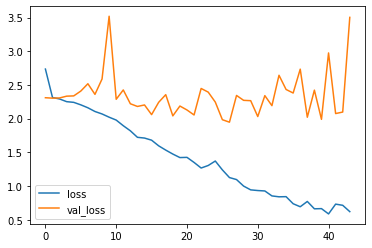

<PrefetchDataset shapes: (<unknown>, (None,)), types: (tf.float32, tf.int64)>
(32, 96, 64)
(32,)
(32, 96, 64)
(32,)
(32, 96, 64)
(32,)
(32, 96, 64)
(32,)
(32, 96, 64)
(32,)
(32, 96, 64)
(32,)
(32, 96, 64)
(32,)
(32, 96, 64)
(32,)
(32, 96, 64)
(32,)
(32, 96, 64)
(32,)
(32, 96, 64)
(32,)
(32, 96, 64)
(32,)
(32, 96, 64)
(32,)
(32, 96, 64)
(32,)
(32, 96, 64)
(32,)
(32, 96, 64)
(32,)
(32, 96, 64)
(32,)
(32, 96, 64)
(32,)
(32, 96, 64)
(32,)
(32, 96, 64)
(32,)
(32, 96, 64)
(32,)
(32, 96, 64)
(32,)
(16, 96, 64)
(16,)
(22, 32, 96, 64)
(704, 96, 64) (22, 32)
eff test: (704, 10)
y_true: (22, 32) [[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
 [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
 [2 2 2 2 2 2 2 2 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4]
 [4 4 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5]
 [5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4]
 [4 4 4 4 4 4 4 4 4 4 4 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]
 [3 3 

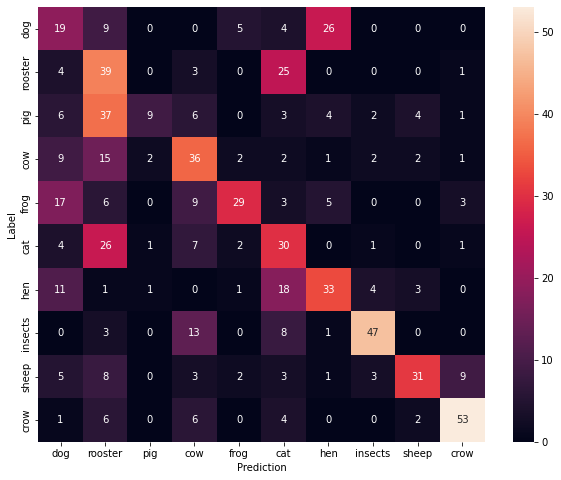

tf.Tensor(
[ 2.3574648e-10 -3.2995379e-10  1.0082385e-10 ...  1.0378823e-03
  1.0628703e-03  1.0445525e-03], shape=(637250,), dtype=float32)
[ 1.4184252   0.76298815 -1.3122808   0.09025842 -2.358427    1.2109541
  1.210528   -1.8941671  -2.8856876  -1.1561474 ]
The main sound is: dog


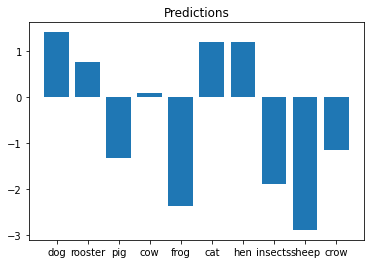

In [2]:

import os

from IPython import display
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import tensorflow as tf

# import tensorflow_datasets as tfds
import tensorflow_hub as hub
import tensorflow_io as tfio

@tf.function
def load_wav_16k_mono(filename):
    """ read in a waveform file and convert to 16 kHz mono """
    file_contents = tf.io.read_file(filename)
    wav, sample_rate = tf.audio.decode_wav(file_contents,desired_channels=1)
    wav = tf.squeeze(wav, axis=-1)
    sample_rate = tf.cast(sample_rate, dtype=tf.int64)
    wav = tfio.audio.resample(wav, rate_in=sample_rate, rate_out=16000)
    return wav

from dataclasses import dataclass

# The following hyperparameters (except patch_hop_seconds) were used to train YAMNet,
# so expect some variability in performance if you change these. The patch hop can
# be changed arbitrarily: a smaller hop should give you more patches from the same
# clip and possibly better performance at a larger computational cost.
@dataclass(frozen=True)  # Instances of this class are immutable.
class Params:
    sample_rate: float = 16000.0
    stft_window_seconds: float = 0.025
    stft_hop_seconds: float = 0.010
    mel_bands: int = 64
    mel_min_hz: float = 125.0
    mel_max_hz: float = 7500.0
    log_offset: float = 0.001
    patch_window_seconds: float = 0.96
    patch_hop_seconds: float = 0.48

    @property
    def patch_frames(self):
        return int(round(self.patch_window_seconds / self.stft_hop_seconds))

    @property
    def patch_bands(self):
        return self.mel_bands

    num_classes: int = 521
    conv_padding: str = 'same'
    batchnorm_center: bool = True
    batchnorm_scale: bool = False
    batchnorm_epsilon: float = 1e-4
    classifier_activation: str = 'sigmoid'
    tflite_compatible: bool = False

"""Feature computation for YAMNet."""

import numpy as np
import tensorflow as tf


def waveform_to_log_mel_spectrogram_patches(waveform, params):
    """Compute log mel spectrogram patches of a 1-D waveform."""
    with tf.name_scope('log_mel_features'):
    # waveform has shape [<# samples>]

    # Convert waveform into spectrogram using a Short-Time Fourier Transform.
    # Note that tf.signal.stft() uses a periodic Hann window by default.
        window_length_samples = int(
          round(params.sample_rate * params.stft_window_seconds))
        hop_length_samples = int(
          round(params.sample_rate * params.stft_hop_seconds))
        fft_length = 2 ** int(np.ceil(np.log(window_length_samples) / np.log(2.0)))
        num_spectrogram_bins = fft_length // 2 + 1
        if params.tflite_compatible:
            magnitude_spectrogram = _tflite_stft_magnitude(
              signal=waveform,
              frame_length=window_length_samples,
              frame_step=hop_length_samples,
              fft_length=fft_length)
        else:
            magnitude_spectrogram = tf.abs(tf.signal.stft(
              signals=waveform,
              frame_length=window_length_samples,
              frame_step=hop_length_samples,
              fft_length=fft_length))
        # magnitude_spectrogram has shape [<# STFT frames>, num_spectrogram_bins]

        # Convert spectrogram into log mel spectrogram.
        linear_to_mel_weight_matrix = tf.signal.linear_to_mel_weight_matrix(
            num_mel_bins=params.mel_bands,
            num_spectrogram_bins=num_spectrogram_bins,
            sample_rate=params.sample_rate,
            lower_edge_hertz=params.mel_min_hz,
            upper_edge_hertz=params.mel_max_hz)
        mel_spectrogram = tf.matmul(
          magnitude_spectrogram, linear_to_mel_weight_matrix)
        log_mel_spectrogram = tf.math.log(mel_spectrogram + params.log_offset)
        # log_mel_spectrogram has shape [<# STFT frames>, params.mel_bands]

        # Frame spectrogram (shape [<# STFT frames>, params.mel_bands]) into patches
        # (the input examples). Only complete frames are emitted, so if there is
        # less than params.patch_window_seconds of waveform then nothing is emitted
        # (to avoid this, zero-pad before processing).
        spectrogram_hop_length_samples = int(
          round(params.sample_rate * params.stft_hop_seconds))
        spectrogram_sample_rate = params.sample_rate / spectrogram_hop_length_samples
        patch_window_length_samples = int(
          round(spectrogram_sample_rate * params.patch_window_seconds))
        patch_hop_length_samples = int(
          round(spectrogram_sample_rate * params.patch_hop_seconds))
        features = tf.signal.frame(
            signal=log_mel_spectrogram,
            frame_length=patch_window_length_samples,
            frame_step=patch_hop_length_samples,
            axis=0)
        # features has shape [<# patches>, <# STFT frames in an patch>, params.mel_bands]

        return log_mel_spectrogram, features


def pad_waveform(waveform, params):
    """Pads waveform with silence if needed to get an integral number of patches."""
    # In order to produce one patch of log mel spectrogram input to YAMNet, we
    # need at least one patch window length of waveform plus enough extra samples
    # to complete the final STFT analysis window.
    min_waveform_seconds = (
      params.patch_window_seconds +
      params.stft_window_seconds - params.stft_hop_seconds)
    min_num_samples = tf.cast(min_waveform_seconds * params.sample_rate, tf.int32)
    num_samples = tf.shape(waveform)[0]
    num_padding_samples = tf.maximum(0, min_num_samples - num_samples)

    # In addition, there might be enough waveform for one or more additional
    # patches formed by hopping forward. If there are more samples than one patch,
    # round up to an integral number of hops.
    num_samples = tf.maximum(num_samples, min_num_samples)
    num_samples_after_first_patch = num_samples - min_num_samples
    hop_samples = tf.cast(params.patch_hop_seconds * params.sample_rate, tf.int32)
    num_hops_after_first_patch = tf.cast(tf.math.ceil(
          tf.cast(num_samples_after_first_patch, tf.float32) /
          tf.cast(hop_samples, tf.float32)), tf.int32)
    num_padding_samples += (
      hop_samples * num_hops_after_first_patch - num_samples_after_first_patch)

    padded_waveform = tf.pad(waveform, [[0, num_padding_samples]],
                           mode='CONSTANT', constant_values=0.0)
    return padded_waveform


def _tflite_stft_magnitude(signal, frame_length, frame_step, fft_length):
    """TF-Lite-compatible version of tf.abs(tf.signal.stft())."""
    def _hann_window():
        return tf.reshape(
            tf.constant(
              (0.5 - 0.5 * np.cos(2 * np.pi * np.arange(0, 1.0, 1.0 / frame_length))
              ).astype(np.float32),
              name='hann_window'), [1, frame_length])

    def _dft_matrix(dft_length):
        """Calculate the full DFT matrix in NumPy."""
        # See https://en.wikipedia.org/wiki/DFT_matrix
        omega = (0 + 1j) * 2.0 * np.pi / float(dft_length)
        # Don't include 1/sqrt(N) scaling, tf.signal.rfft doesn't apply it.
        return np.exp(omega * np.outer(np.arange(dft_length), np.arange(dft_length)))

    def _rdft(framed_signal, fft_length):
        """Implement real-input Discrete Fourier Transform by matmul."""
        # We are right-multiplying by the DFT matrix, and we are keeping only the
        # first half ("positive frequencies").  So discard the second half of rows,
        # but transpose the array for right-multiplication.  The DFT matrix is
        # symmetric, so we could have done it more directly, but this reflects our
        # intention better.
        complex_dft_matrix_kept_values = _dft_matrix(fft_length)[:(
            fft_length // 2 + 1), :].transpose()
        real_dft_matrix = tf.constant(
            np.real(complex_dft_matrix_kept_values).astype(np.float32),
            name='real_dft_matrix')
        imag_dft_matrix = tf.constant(
            np.imag(complex_dft_matrix_kept_values).astype(np.float32),
            name='imaginary_dft_matrix')
        signal_frame_length = tf.shape(framed_signal)[-1]
        half_pad = (fft_length - signal_frame_length) // 2
        padded_frames = tf.pad(
            framed_signal,
            [
                # Don't add any padding in the frame dimension.
                [0, 0],
                # Pad before and after the signal within each frame.
                [half_pad, fft_length - signal_frame_length - half_pad]
            ],
            mode='CONSTANT',
            constant_values=0.0)
        real_stft = tf.matmul(padded_frames, real_dft_matrix)
        imag_stft = tf.matmul(padded_frames, imag_dft_matrix)
        return real_stft, imag_stft

    def _complex_abs(real, imag):
        return tf.sqrt(tf.add(real * real, imag * imag))

    framed_signal = tf.signal.frame(signal, frame_length, frame_step)
    windowed_signal = framed_signal * _hann_window()
    real_stft, imag_stft = _rdft(windowed_signal, fft_length)
    stft_magnitude = _complex_abs(real_stft, imag_stft)
    return stft_magnitude


yamnet_model_handle = 'https://tfhub.dev/google/yamnet/1'
yamnet_model = hub.load(yamnet_model_handle)

esc50_csv = './meta/esc50.csv'
base_data_path = './audio/'

#파일 불러오기
pd_data = pd.read_csv(esc50_csv, encoding = 'cp949')
pd_data.head()

#클래스 지정, 필터링
animal_classes = ['dog', 'rooster', 'pig', 'cow', 'frog', 'cat', 'hen', 'insects', 'sheep', 'crow']
animal_class_to_id = {'dog':0, 'rooster':1, 'pig':2, 'cow':3, 'frog':4, 'cat':5, 'hen':6, 'insects':7, 'sheep':8, 'crow':9}

filtered_pd = pd_data[pd_data.category.isin(animal_classes)]

class_id = filtered_pd['category'].apply(lambda name: animal_class_to_id[name])
filtered_pd = filtered_pd.assign(target=class_id)

full_path = filtered_pd['filename'].apply(lambda row: os.path.join(base_data_path, row))
filtered_pd = filtered_pd.assign(filename=full_path)
print(filtered_pd.head(10))

#데이터 
filenames = filtered_pd['filename']
targets = filtered_pd['target']
folds = filtered_pd['fold']

main_ds = tf.data.Dataset.from_tensor_slices((filenames, targets, folds))
print(main_ds.element_spec)

#모델을 위한 wav 데이터 mapping
def load_wav_for_map(filename, label, fold):
    return load_wav_16k_mono(filename), label, fold

main_ds = main_ds.map(load_wav_for_map)
print(main_ds)
print(main_ds.element_spec)

def extract_spectrogram(wav_data, label, fold):
    ''' run YAMNet to extract embedding from the wav data '''
    scores, embeddings, spectrogram = yamnet_model(wav_data)
    mel_spec, features=waveform_to_log_mel_spectrogram_patches(wav_data, Params)
    num_embeddings = tf.shape(features)[0]
#     jump_val = 48
#     spectrogram_mat = spectrogram[i*jump_val:(i+2)*jump_val]
    return (features, tf.repeat(label, num_embeddings), tf.repeat(fold, num_embeddings))

# extract embedding
main_ds = main_ds.map(extract_spectrogram).unbatch()
print('extracted : ',main_ds)
print('spec : ', main_ds.element_spec)

cached_ds = main_ds.cache()
train_ds = cached_ds.filter(lambda spectrogram, label, fold: fold < 4)
val_ds = cached_ds.filter(lambda spectrogram, label, fold: fold == 4)
test_ds = cached_ds.filter(lambda spectrogram, label, fold: fold == 5)

# remove the folds column now that it's not needed anymore
remove_fold_column = lambda spectrogram, label, fold: (spectrogram, label)

train_ds = train_ds.map(remove_fold_column)
val_ds = val_ds.map(remove_fold_column)
test_ds = test_ds.map(remove_fold_column)

train_ds = train_ds.cache().shuffle(1000).batch(32).prefetch(tf.data.AUTOTUNE)
val_ds = val_ds.cache().batch(32).prefetch(tf.data.AUTOTUNE)
test_ds = test_ds.cache().batch(32).prefetch(tf.data.AUTOTUNE)

eff_model_ = tf.keras.applications.EfficientNetB3(include_top=False, weights=None, input_shape=[96,64,1], 
                                                  pooling = 'max', classes = 10)

eff_model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(96,64), dtype=tf.float32,
                          name='input_spectrogram'),
    tf.keras.layers.Reshape((96,64,1), input_shape=(96,64)),
    eff_model_,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(512, activation='relu'),
#     layers.Dropout(0.5),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10),
], name='eff_model')

print(eff_model.summary())
print(train_ds)
eff_model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                 optimizer="adam", metrics=['accuracy'])

callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3, restore_best_weights=True)

history = eff_model.fit(train_ds, epochs=100, validation_data=val_ds, callbacks=callback)

loss, accuracy = eff_model.evaluate(test_ds)
print("Loss: ", loss)
print("Accuracy: ", accuracy)

metrics = history.history
plt.plot(history.epoch, metrics['loss'], metrics['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.show()

print(test_ds)

import functools
def combine_dims(a, i=0, n=1):

# Combines dimensions of numpy array `a`, 
# starting at index `i`,
# and combining `n` dimensions
    s = list(a.shape)
    combined = functools.reduce(lambda x,y: x*y, s[i:i+n+1])
    return np.reshape(a, s[:i] + [combined] + s[i+n+1:])

test_audio = []
test_labels = []

# test_audio = []
# test_labels = []

# for audio, label in test_ds:
#     test_audio.append(audio.numpy())
#     test_labels.append(label.numpy())

# test_audio = np.array(test_audio)
# test_labels = np.array(test_labels)

# y_pred = np.argmax(model.predict(test_audio), axis=1)
# y_true = test_labels
for audio, label in test_ds:
    print(audio.shape)
    print(label.shape)
    if audio.shape[0] != 16:
        test_audio.append(audio.numpy())
        test_labels.append(label.numpy())

test_audio = np.array(test_audio)
test_labels = np.array(test_labels)
print(test_audio.shape)
test_audio = combine_dims(test_audio)
print(test_audio.shape, test_labels.shape)
# print(test_labels.shape)

print('eff test:', eff_model.predict(test_audio).shape)


y_true = test_labels
print('y_true:',y_true.shape, y_true)
y_pred = np.argmax(eff_model.predict(test_audio), axis=1)
print('y_pred:',y_pred.shape, y_pred)
y_true = y_true.flatten()
y_pred = y_pred.flatten()

confusion_mtx = tf.math.confusion_matrix(y_true, y_pred) 
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx, xticklabels=animal_classes, yticklabels=animal_classes,annot=True, fmt='g')
plt.xlabel('Prediction')
plt.ylabel('Label')
plt.show()

testing_wav_file_name = 'frog02.wav'
testing_wav_data = load_wav_16k_mono(testing_wav_file_name)
print(testing_wav_data)
t_mel_spec, t_feat=waveform_to_log_mel_spectrogram_patches(testing_wav_data, Params)
# scores, embeddings, spectrogram = yamnet_model(testing_wav_data)
result = eff_model(t_feat).numpy()
print(result.mean(axis=0))

infered_class = animal_classes[result.mean(axis=0).argmax()]
print(f'The main sound is: {infered_class}')

plt.bar(animal_classes, result.mean(axis=0))
plt.title('Predictions')
plt.show()

# scores, embeddings, spectrogram = yamnet_model(testing_wav_data)
# class_scores = tf.reduce_mean(scores, axis=0)
# top_class = tf.argmax(class_scores)
# infered_class = class_names[top_class]
# top_score = class_scores[top_class]
# print(f'[YAMNet] The main sound is: {infered_class} ({top_score})')

^C
